## Rough Work : Tube Assembly

### Step1. Load Libraries 

In [3]:
#load libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import glob as gl

from functools import reduce  # ask about this library

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## Concatinating all tables in one big table 

In [4]:
# Read multiple files together and concatinating all fileds in to one file:

csv_files = gl.glob('*.csv')
print('Number of Files:','\n',len(csv_files),'\n''Filenames:','\n', csv_files)

df_data= []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_data.append(df)

df_full= pd.concat(df_data)


Number of Files: 
 21 
Filenames: 
 ['comp_threaded.csv', 'comp_adaptor.csv', 'tube_end_form.csv', 'comp_straight.csv', 'comp_tee.csv', 'comp_boss.csv', 'components.csv', 'comp_float.csv', 'bill_of_materials.csv', 'comp_elbow.csv', 'type_connection.csv', 'train_set.csv', 'comp_sleeve.csv', 'test_set.csv', 'tube.csv', 'comp_hfl.csv', 'type_end_form.csv', 'comp_other.csv', 'type_component.csv', 'specs.csv', 'comp_nut.csv']


In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128215 entries, 0 to 64
Columns: 116 entries, adaptor_angle to weight
dtypes: float64(57), object(59)
memory usage: 114.4+ MB


In [6]:
df_full.head()

,adaptor_angle,annual_usage,base_diameter,base_type,bend_radius,blind_hole,bolt_pattern_long,bolt_pattern_wide,bracket_pricing,component_id,...,thread_size,thread_size_1,thread_size_2,thread_size_3,thread_size_4,tube_assembly_id,type,unique_feature,wall,weight
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-0007,...,NaN,0.437,NaN,NaN,NaN,NaN,NaN,No,NaN,0.028
1,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-0030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,0.914
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-0041,...,NaN,NaN,0.812,NaN,NaN,NaN,NaN,No,NaN,0.120
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-0043,...,NaN,NaN,0.812,NaN,NaN,NaN,NaN,No,NaN,0.090
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-0044,...,NaN,NaN,1.437,NaN,NaN,NaN,NaN,No,NaN,0.182


In [7]:
#head of BOM table
df_data[8].head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Melting BOM table
df_bom = df_data[8]
df_bom_melt= df_bom.melt(id_vars='tube_assembly_id',value_vars = ['component_id_1', 'component_id_2','component_id_3','component_id_4','component_id_5','component_id_6','component_id_7','component_id_8'],value_name='component_id')
df_bom_t = (df_bom_melt.merge(df_bom, how = 'inner', on = 'tube_assembly_id')).drop(columns= ['component_id_1', 'component_id_2','component_id_3','component_id_4','component_id_5','component_id_6','component_id_7','component_id_8'])
df_bom_t.head(10)

#df_bom_t.dropna(axis= 'columns', how = 'all')
#(df_bom_t[df_bom_t[3:].isnull()== True]).dropna(how = 'all' ,axis = 'columns')

,tube_assembly_id,variable,component_id,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8
0,TA-00001,component_id_1,C-1622,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00001,component_id_2,C-1629,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00001,component_id_3,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00001,component_id_4,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00001,component_id_5,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
5,TA-00001,component_id_6,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
6,TA-00001,component_id_7,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
7,TA-00001,component_id_8,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8,TA-00002,component_id_1,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,TA-00002,component_id_2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#table showing quantity distribution
df_bom_t.iloc[0:, 3:].head()

,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8
0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


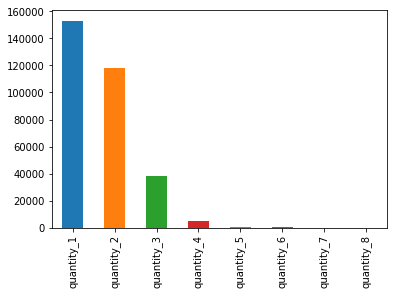

In [10]:
df_bom_t.iloc[0:, 3:].notnull().sum().plot(kind='bar')

### Observation: 

1.Shows quantity distribution of all eight components in descending order. 

2.Need to investigate why quantity distribution from 4 through to 8 is low. 

3.Is it due to cost of specialized manufacturing, supplier proximity, or used less in assembly. 

## Rough Work: What can we do with Component Tables

### Step2: Load Component Tables 

In [11]:
#1.Component
df_comp = pd.read_csv('components.csv')

#2.Adaptor
df_ada = pd.read_csv('comp_adaptor.csv')

#3.Boss
df_bos = pd.read_csv('comp_boss.csv')

#4. Elbow
df_elb = pd.read_csv('comp_elbow.csv')

#5. Float
df_flt = pd.read_csv('comp_float.csv')

#6. HFL
df_hfl = pd.read_csv('comp_hfl.csv')

#7. Nut
df_nut = pd.read_csv('comp_nut.csv')

#8. Other
df_oth = pd.read_csv('comp_other.csv')

#9. Sleeve
df_slv = pd.read_csv('comp_sleeve.csv')

#10. Straight
df_str = pd.read_csv('comp_straight.csv')

#11. Tee
df_tee = pd.read_csv('comp_tee.csv')

#12. Threaded
df_thr = pd.read_csv('comp_threaded.csv')

#12 End-Form: 
df_end = pd.read_csv('tube_end_form.csv')

In [12]:
#Problem: How to merge this table with df_11 as reference id's don't match? 
print(df_end.head())
print(df_thr[['end_form_id_1', 'end_form_id_2', 'end_form_id_3', 'end_form_id_4']].head())
print(df_ada[['end_form_id_1', 'end_form_id_2']].head())

  end_form_id forming
0      EF-001     Yes
1      EF-002      No
2      EF-003      No
3      EF-004      No
4      EF-005     Yes
  end_form_id_1 end_form_id_2 end_form_id_3 end_form_id_4
0         A-001         A-004           NaN           NaN
1         A-003         A-003           NaN           NaN
2         A-004         A-001           NaN           NaN
3         A-003         A-001           NaN           NaN
4         A-004         A-001           NaN           NaN
  end_form_id_1 end_form_id_2
0         A-001         A-001
1         A-001         A-001
2         A-007         A-001
3         A-007         A-001
4         A-001         A-007


### Step3: Merge Component Tables along component_id as secondary key

In [13]:
# Merge 1: df_comp & df_ada
# Common Labels: component_id, component_type_id 

df_1 = pd.merge(left = df_comp, right= df_ada, on = ['component_id', 'component_type_id'], how = 'left')

#Merge 2: df_1 & df_bos
#Common Labels: component_id, component_type_id, 
#Different Label common fields: connection_type_id, connection_type_id_1, connection_type_id_2

# Merging 2 on common lables for now: 
df_2 = pd.merge(left = df_1 , right = df_bos, on = ['component_id','component_type_id', 'unique_feature', 'orientation'], how = 'left')


#Merge3: df_2 and df_elb
#Common Labels: component_id, component_type_id

df_3 = pd.merge(left = df_2 , right = df_elb, on = ['component_id','component_type_id'], how = 'left')

#Merge 4: 
#Common Labels: component_id, component_type_id
df_4 = pd.merge(left = df_3 , right = df_flt, on = ['component_id','component_type_id'], how = 'left')

#Merge 5: 
#Common Labels: component_id, component_type_id
df_5 = pd.merge(left = df_4 , right = df_hfl, on = ['component_id','component_type_id'], how = 'left')

#Merge 6: 
#Common Labels: component_id, component_type_id
df_6 = pd.merge(left = df_5 , right = df_nut, on = ['component_id','component_type_id'], how = 'left')

#Merge 7: 
#Common Labels: component_id
df_7 = pd.merge(left = df_6 , right = df_oth, on = ['component_id'], how = 'left')

#Merge 8: 
#Common Labels: component_id, component_type_id, connection_type_id
df_8 = pd.merge(left = df_7 , right = df_slv, on = ['component_id','component_type_id', 'connection_type_id'], how = 'left')

#Merge 9: 
#Common Labels: component_id, component_type_id
df_9 = pd.merge(left = df_8 , right = df_str, on = ['component_id','component_type_id','mj_class_code'], how = 'left')

#Merge 10: 
#Common Labels: component_id, component_type_id
df_10 = pd.merge(left = df_9 , right = df_tee, on = ['component_id','component_type_id', 'mj_class_code', 'mj_plug_class_code'], how = 'left')

#Merge 11: 
#Common Labels: component_id, component_type_id, end_form_id_1, end_form_id_2
df_11 = pd.merge(left = df_10 , right = df_thr, on = ['component_id','component_type_id','end_form_id_1', 'end_form_id_2', 'connection_type_id_1','connection_type_id_2'], how = 'left')

In [14]:
df_11[['component_id', 'name', 'component_type_id', 'end_form_id_1',
       'connection_type_id_1', 'end_form_id_2', 'connection_type_id_2',
       'unique_feature_x', 'orientation_x', 'type', 'connection_type_id',
       'outside_shape', 'base_type', 'groove_x', 'unique_feature_y',
       'orientation_y', 'mj_class_code', 'mj_plug_class_code', 'groove_y',
       'unique_feature_x', 'orientation_x', 'orientation_y',
       'corresponding_shell', 'coupling_class', 'material', 'plating_x',
       'orientation_x', 'thread_size', 'blind_hole', 'orientation_y',
       'part_name', 'unique_feature_y', 'plating_y', 'orientation_x',
       'groove_x', 'unique_feature_x', 'orientation_y', 'groove_y',
       'unique_feature_y', 'orientation_x', 'nominal_size_1_y',
       'end_form_id_3', 'connection_type_id_3', 'end_form_id_4',
       'connection_type_id_4', 'unique_feature', 'orientation_y']]

KeyError: "['unique_feature'] not in index"

### Step4: Pre-process data and clean merged table

In [15]:
#Initial Merged Table Data Type: 
df_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Columns: 121 entries, component_id to weight
dtypes: float64(76), object(45)
memory usage: 1.9+ MB


In [16]:
#Convert Object to Categories
df_11[df_11.select_dtypes(['object']).columns] = df_11.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [17]:
#Final Merged Table Data Type:  
df_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Columns: 121 entries, component_id to weight
dtypes: category(27), float64(76), object(18)
memory usage: 1.7+ MB


In [18]:
df_11.select_dtypes(['category', 'object']).columns

Index(['component_id', 'name', 'component_type_id', 'end_form_id_1',
       'connection_type_id_1', 'end_form_id_2', 'connection_type_id_2',
       'unique_feature_x', 'orientation_x', 'type', 'connection_type_id',
       'outside_shape', 'base_type', 'groove_x', 'mj_class_code',
       'mj_plug_class_code', 'groove_y', 'unique_feature_y', 'orientation_y',
       'orientation_x', 'corresponding_shell', 'coupling_class', 'material',
       'plating_x', 'orientation_y', 'thread_size', 'blind_hole',
       'orientation_x', 'part_name', 'unique_feature_x', 'plating_y',
       'orientation_y', 'groove_x', 'unique_feature_y', 'orientation_x',
       'groove_y', 'unique_feature_x', 'orientation_y', 'nominal_size_1_y',
       'end_form_id_3', 'connection_type_id_3', 'end_form_id_4',
       'connection_type_id_4', 'unique_feature_y', 'orientation'],
      dtype='object')

In [19]:
df_11[['unique_feature_x', 'orientation_x', 'groove_x', 'unique_feature_y',
       'orientation_y', 'groove_y', 'unique_feature_x', 'orientation_x',
       'orientation_y', 'orientation_x', 'orientation_y', 'unique_feature_y',
       'orientation_x', 'groove_x', 'unique_feature_x', 'orientation_y',
       'groove_y', 'unique_feature_y', 'orientation_x', 'orientation_y']].head()

,unique_feature_x,unique_feature_x,unique_feature_x,orientation_x,orientation_x,orientation_x,orientation_x,groove_x,groove_x,unique_feature_y,...,unique_feature_y,unique_feature_y,orientation_x,orientation_x,orientation_x,orientation_x,orientation_y,orientation_y,orientation_y,orientation_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN


In [20]:
df_11[['component_id', 'name', 'component_type_id', 'end_form_id_1_x',
       'connection_type_id_1_x', 'end_form_id_2_x', 'connection_type_id_2_x',
       'type', 'connection_type_id_x', 'outside_shape', 'base_type',
       'mj_class_code_x', 'mj_plug_class_code_x', 'corresponding_shell',
       'coupling_class', 'material', 'plating_x', 'thread_size', 'blind_hole',
       'part_name', 'connection_type_id_y', 'plating_y', 'mj_class_code_y',
       'mj_class_code', 'mj_plug_class_code_y', 'end_form_id_1_y',
       'connection_type_id_1_y', 'nominal_size_1_y', 'end_form_id_2_y',
       'connection_type_id_2_y', 'end_form_id_3', 'connection_type_id_3',
       'end_form_id_4', 'connection_type_id_4', 'unique_feature']]

KeyError: "['end_form_id_1_x' 'connection_type_id_1_x' 'end_form_id_2_x'\n 'connection_type_id_2_x' 'connection_type_id_x' 'mj_class_code_x'\n 'mj_plug_class_code_x' 'connection_type_id_y' 'mj_class_code_y'\n 'mj_plug_class_code_y' 'end_form_id_1_y' 'connection_type_id_1_y'\n 'end_form_id_2_y' 'connection_type_id_2_y' 'unique_feature'] not in index"

## How to use these tables? 

In [21]:
df_comp_type = pd.read_csv('type_component.csv', index_col='component_type_id')
df_connection_type = pd.read_csv('type_connection.csv', index_col='connection_type_id')
df_end_type = pd.read_csv('type_end_form.csv', index_col='end_form_id')
df_end_form = pd.read_csv('tube_end_form.csv', index_col='end_form_id')

In [26]:
df_end_form.head()

,forming
end_form_id,
EF-001,Yes
EF-002,No
EF-003,No
EF-004,No
EF-005,Yes


In [25]:
df_end_type.head()

,name
end_form_id,
A-001,Male (Stud)
A-002,Male (Swivel)
A-003,Braze-Weld Boss
A-004,Braze-Weld Socket
A-005,Swivel Nut


In [24]:
df_comp_type.head()

,name
component_type_id,
CP-001,4-bolt Tig Straight
CP-002,4-bolt MJ Straight
CP-003,4-bolt Braze/Weld Straight
CP-004,2-bolt Braze/Weld Straight
CP-005,2-bolt MJ Straight
